In [18]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [19]:
#Reading data from the csv file
df = pd.read_csv('Bondora_preprocess.csv')

In [21]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaulterData
0,1355,0,645.0,NoPrior CreditHistory,3.0,4,28,0.0,FI,2000.0,2000.0,24.46,60,63.90,POHJOIS-SAVO,KUOPIO,Other,Higher Education,Cohabitant,Fully Employed,UpTo2Years,Construction,Owner,2097.0,1,629.00,0,3.05,1404.10,15,2020-01-17,D,OriginalMaturityDateIncreased,NaN,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0,0
1,1000,0,0.0,Prior CreditHistory,4.0,1,27,0.0,EE,1000.0,1000.0,17.74,60,28.17,LÄÄNE-VIRUMAA,SÕMERU VALD,Other,Secondary Education,Single,Fully Employed,UpTo1Year,Other,Joint Tenant,560.0,8,1327.37,2,47.56,43.67,6,2020-01-08,B,OriginalMaturityDateIncreased,NaN,608.05,638.67,391.95,0.0,1,1300.0,187.87,0,0
2,2345,0,655.0,Prior CreditHistory,3.0,1,29,0.0,EE,3000.0,3000.0,17.87,60,84.72,PÄRNUMAA,PÄRNU,Other,Basic Education,Single,Fully Employed,UpTo3Years,Processing,"Tenant, Pre-Furnished Property",745.0,4,427.03,0,27.48,290.28,14,2020-01-23,B,OriginalMaturityDateIncreased,NaN,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0,0
3,2045,0,955.0,NoPrior CreditHistory,3.0,4,25,0.0,FI,3000.0,3000.0,27.98,60,102.12,POHJOIS-SAVO,KUOPIO,Loan Consolidation,Vocational Education,Single,Fully Employed,UpTo5Years,Info and Telecom,"Tenant, Unfurnished Property",1530.0,4,955.00,0,36.41,472.88,27,2020-01-20,D,OriginalMaturityDateIncreased,NaN,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0,0
4,1500,0,0.0,NoPrior CreditHistory,1.0,1,30,0.0,EE,1500.0,1500.0,29.25,60,52.84,TARTU,KABINA,Other,Secondary Education,Cohabitant,Entrepreneur,MoreThan5Years,Utilities,"Tenant, Pre-Furnished Property",1500.0,2,465.00,0,4.52,982.16,25,2019-12-27,D,No_OriginalMaturityDateIncreased,NaN,1453.11,1396.06,46.89,0.0,0,0.0,0.00,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57135 entries, 0 to 57134
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    57135 non-null  int64  
 1   BidsApi                                 57135 non-null  int64  
 2   BidsManual                              57135 non-null  float64
 3   NewCreditCustomer                       57135 non-null  object 
 4   VerificationType                        57135 non-null  float64
 5   LanguageCode                            57135 non-null  int64  
 6   Age                                     57135 non-null  int64  
 7   Gender                                  57135 non-null  float64
 8   Country                                 57135 non-null  object 
 9   AppliedAmount                           57135 non-null  float64
 10  Amount                                  57135 non-null  fl

In [23]:
# Inspect missing values in the dataset
print(df.isnull().values.sum())

52289


In [24]:
df.shape

(57135, 43)

In [25]:
df = df.drop('PreviousRepaymentsBeforeLoan',axis=1)

In [26]:
df = df.drop('County',axis=1)

In [27]:
missing_values_count = df.isnull().sum()
# looking at the number of missing points in the first ten columns
missing_values_count

BidsPortfolioManager                         0
BidsApi                                      0
BidsManual                                   0
NewCreditCustomer                            0
VerificationType                             0
LanguageCode                                 0
Age                                          0
Gender                                       0
Country                                      0
AppliedAmount                                0
Amount                                       0
Interest                                     0
LoanDuration                                 0
MonthlyPayment                              58
City                                      4750
UseOfLoan                                    0
Education                                    0
MaritalStatus                                0
EmploymentStatus                             0
EmploymentDurationCurrentEmployer            2
OccupationArea                               0
HomeOwnership

In [28]:
df = df.dropna(axis=0)

In [29]:
missing_values_count = df.isnull().sum()
# looking at the number of missing points in the first ten columns
missing_values_count

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeTotal                     

In [30]:
df.shape

(45813, 41)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45813 entries, 6 to 56305
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    45813 non-null  int64  
 1   BidsApi                                 45813 non-null  int64  
 2   BidsManual                              45813 non-null  float64
 3   NewCreditCustomer                       45813 non-null  object 
 4   VerificationType                        45813 non-null  float64
 5   LanguageCode                            45813 non-null  int64  
 6   Age                                     45813 non-null  int64  
 7   Gender                                  45813 non-null  float64
 8   Country                                 45813 non-null  object 
 9   AppliedAmount                           45813 non-null  float64
 10  Amount                                  45813 non-null  fl

In [35]:
df.to_csv('Bondora_clean.csv',index=False)

In [40]:
df=pd.read_csv('Bondora_clean.csv')

In [43]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaulterData
0,1500,0,0.0,NoPrior CreditHistory,4.0,6,47,1.0,ES,1500.0,1500.0,73.73,60,99.81,VILLATORO,Other,Secondary Education,Cohabitant,Fully Employed,UpTo3Years,Healthcare and SocialHelp,"Tenant, Pre-Furnished Property",1206.0,5,670.00,0,33.90,436.19,25,2020-01-02,HR,OriginalMaturityDateIncreased,M5,973.08,4643.17,526.92,0.0,0,0.0,0,0
1,1325,0,175.0,NoPrior CreditHistory,3.0,6,53,0.0,ES,1500.0,1500.0,24.70,60,48.76,MONTORNÉS DEL VALLÉS,Other,Secondary Education,Single,Fully Employed,UpTo1Year,Utilities,Living with Parents,885.0,1,350.00,0,5.51,486.24,3,2020-01-15,D,OriginalMaturityDateIncreased,M2,1337.71,1211.26,162.29,0.0,0,0.0,0,0
2,1580,0,120.0,Prior CreditHistory,4.0,6,46,0.0,ES,1700.0,1700.0,31.12,60,61.84,MADRID,Other,Secondary Education,Single,Fully Employed,UpTo5Years,Other,Joint Ownership,985.0,7,1395.88,2,60.68,37.28,1,2020-01-02,E,OriginalMaturityDateIncreased,M3,1199.09,1876.08,500.91,0.0,1,1900.0,0,0
3,3580,0,420.0,NoPrior CreditHistory,3.0,6,48,1.0,ES,4000.0,4000.0,31.12,60,145.51,MADRID,Education,Vocational Education,Divorced,Fully Employed,MoreThan5Years,Administrative,Owner,1534.0,2,916.80,0,39.26,471.69,1,2020-01-16,E,OriginalMaturityDateIncreased,M1,3097.80,4404.05,902.20,0.0,0,0.0,0,0
4,1000,0,0.0,NoPrior CreditHistory,1.0,6,65,0.0,ES,1000.0,1000.0,31.12,60,35.97,OZA DOS RÍOS,Home Improvement,Higher Education,Married,Retiree,UpTo2Years,Construction,Owner,1044.0,1,350.00,0,3.45,658.03,25,2019-12-26,E,OriginalMaturityDateIncreased,M1,846.59,1033.47,153.41,0.0,0,0.0,0,0


Text(0.5, 0, 'Home ownership')

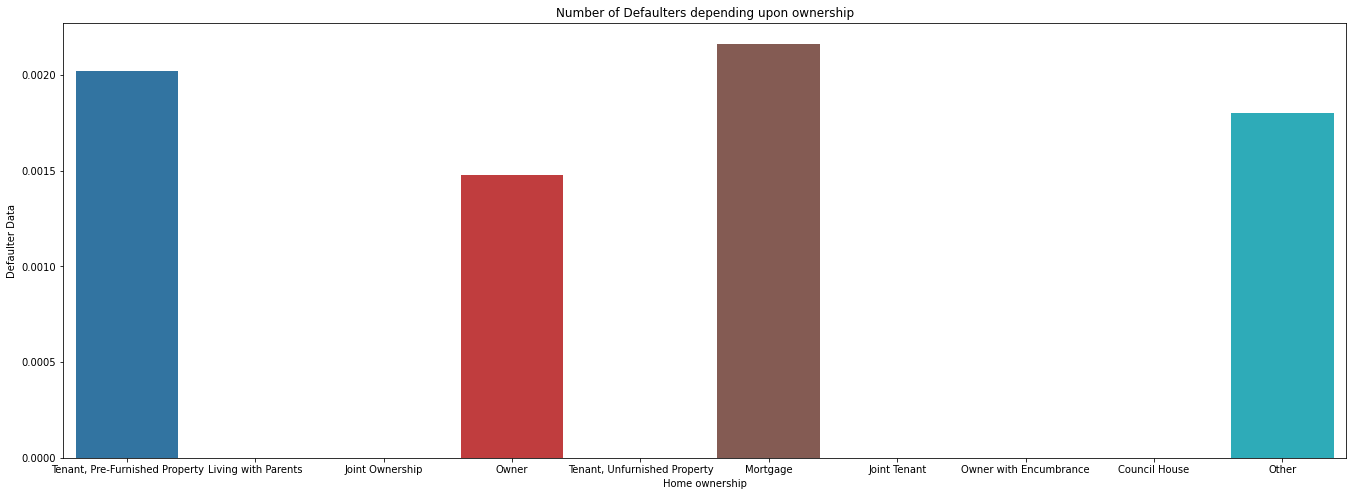

In [67]:
# Set the width and height of the figure
plt.figure(figsize=(23,8))

# Add title
plt.title("Number of Defaulters depending upon ownership")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['HomeOwnershipType'], y=df['DefaulterData'], ci=None)

# Add label for axises
plt.ylabel("Defaulter Data")
plt.xlabel("Home ownership")

This Bar Plot clearly shows that the most number of defaulters are those who are on mortgage loan. Second is Tenant, Pre furnished property owners. While people living with parents, joint ownership and other never defaulted

In [73]:
G_Classes={ 0:"Male" , 1: "Woman" , 2:"Undefined"}

df["Gender"].value_counts()

0.0    30110
1.0    13869
2.0     1834
Name: Gender, dtype: int64

In [74]:
df["Gender"]= df["Gender"].map(G_Classes.get).astype("category")
df["Gender"].value_counts()

Male         30110
Woman        13869
Undefined     1834
Name: Gender, dtype: int64

Text(0.5, 0, 'Gender')

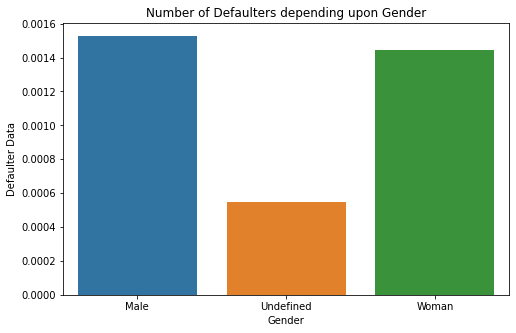

In [77]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Add title
plt.title("Number of Defaulters depending upon Gender")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['Gender'], y=df['DefaulterData'], ci=None)

# Add label for axises
plt.ylabel("Defaulter Data")
plt.xlabel("Gender")

This graph shows that being defaulter doesn't depend upon gender. Whether you are male or female both are equally defaulted.

Text(0.5, 0, 'Education')

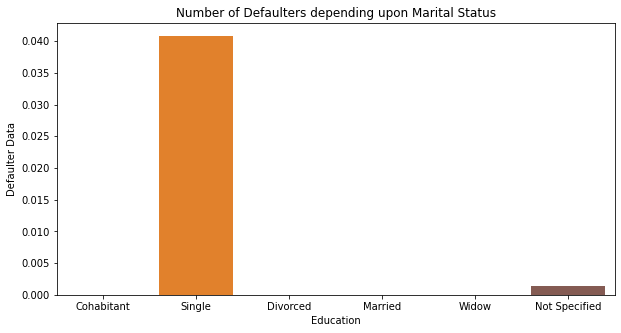

In [91]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Number of Defaulters depending upon Marital Status")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['MaritalStatus'], y=df['DefaulterData'], ci=None)

# Add label for axises
plt.ylabel("Defaulter Data")
plt.xlabel("Education")

This shows a very important trend that only single people are defaulters 

Text(0.5, 0, 'Employment Status')

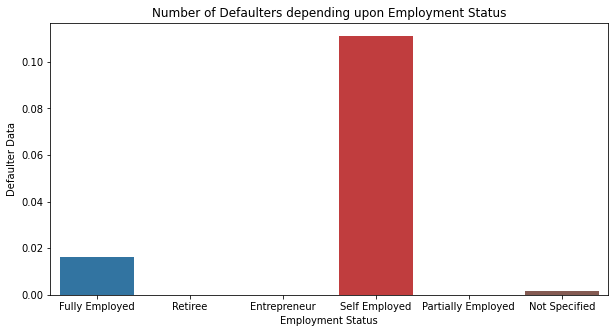

In [90]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Number of Defaulters depending upon Employment Status")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['EmploymentStatus'], y=df['DefaulterData'], ci=None)

# Add label for axises
plt.ylabel("Defaulter Data")
plt.xlabel("Employment Status")

Self Employed are defaultees

In [95]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [96]:
correlation = numeric_data.corr()
print(correlation['DefaulterData'].sort_values(ascending= False),'\n')

DefaulterData                             1.000000
InterestAndPenaltyPaymentsMade            0.050451
Interest                                  0.045806
IncomeTotal                               0.040773
LanguageCode                              0.039882
MonthlyPayment                            0.033976
BidsPortfolioManager                      0.029520
PrincipalPaymentsMade                     0.023576
FreeCash                                  0.021202
DebtToIncome                              0.018632
AppliedAmount                             0.016420
InterestAndPenaltyBalance                 0.016216
VerificationType                          0.015984
Age                                       0.015092
Amount                                    0.012350
BidsManual                                0.007966
PrincipalBalance                          0.007638
LiabilitiesTotal                          0.007360
RefinanceLiabilities                     -0.000745
LoanDuration                   

InterestAndPenaltyPaymentsMade and Interest are strongly positively correlated while NoOfPreviousLoansBeforeLoan and AmountOfPreviousLoansBeforeLoan are strongly negative correlated.

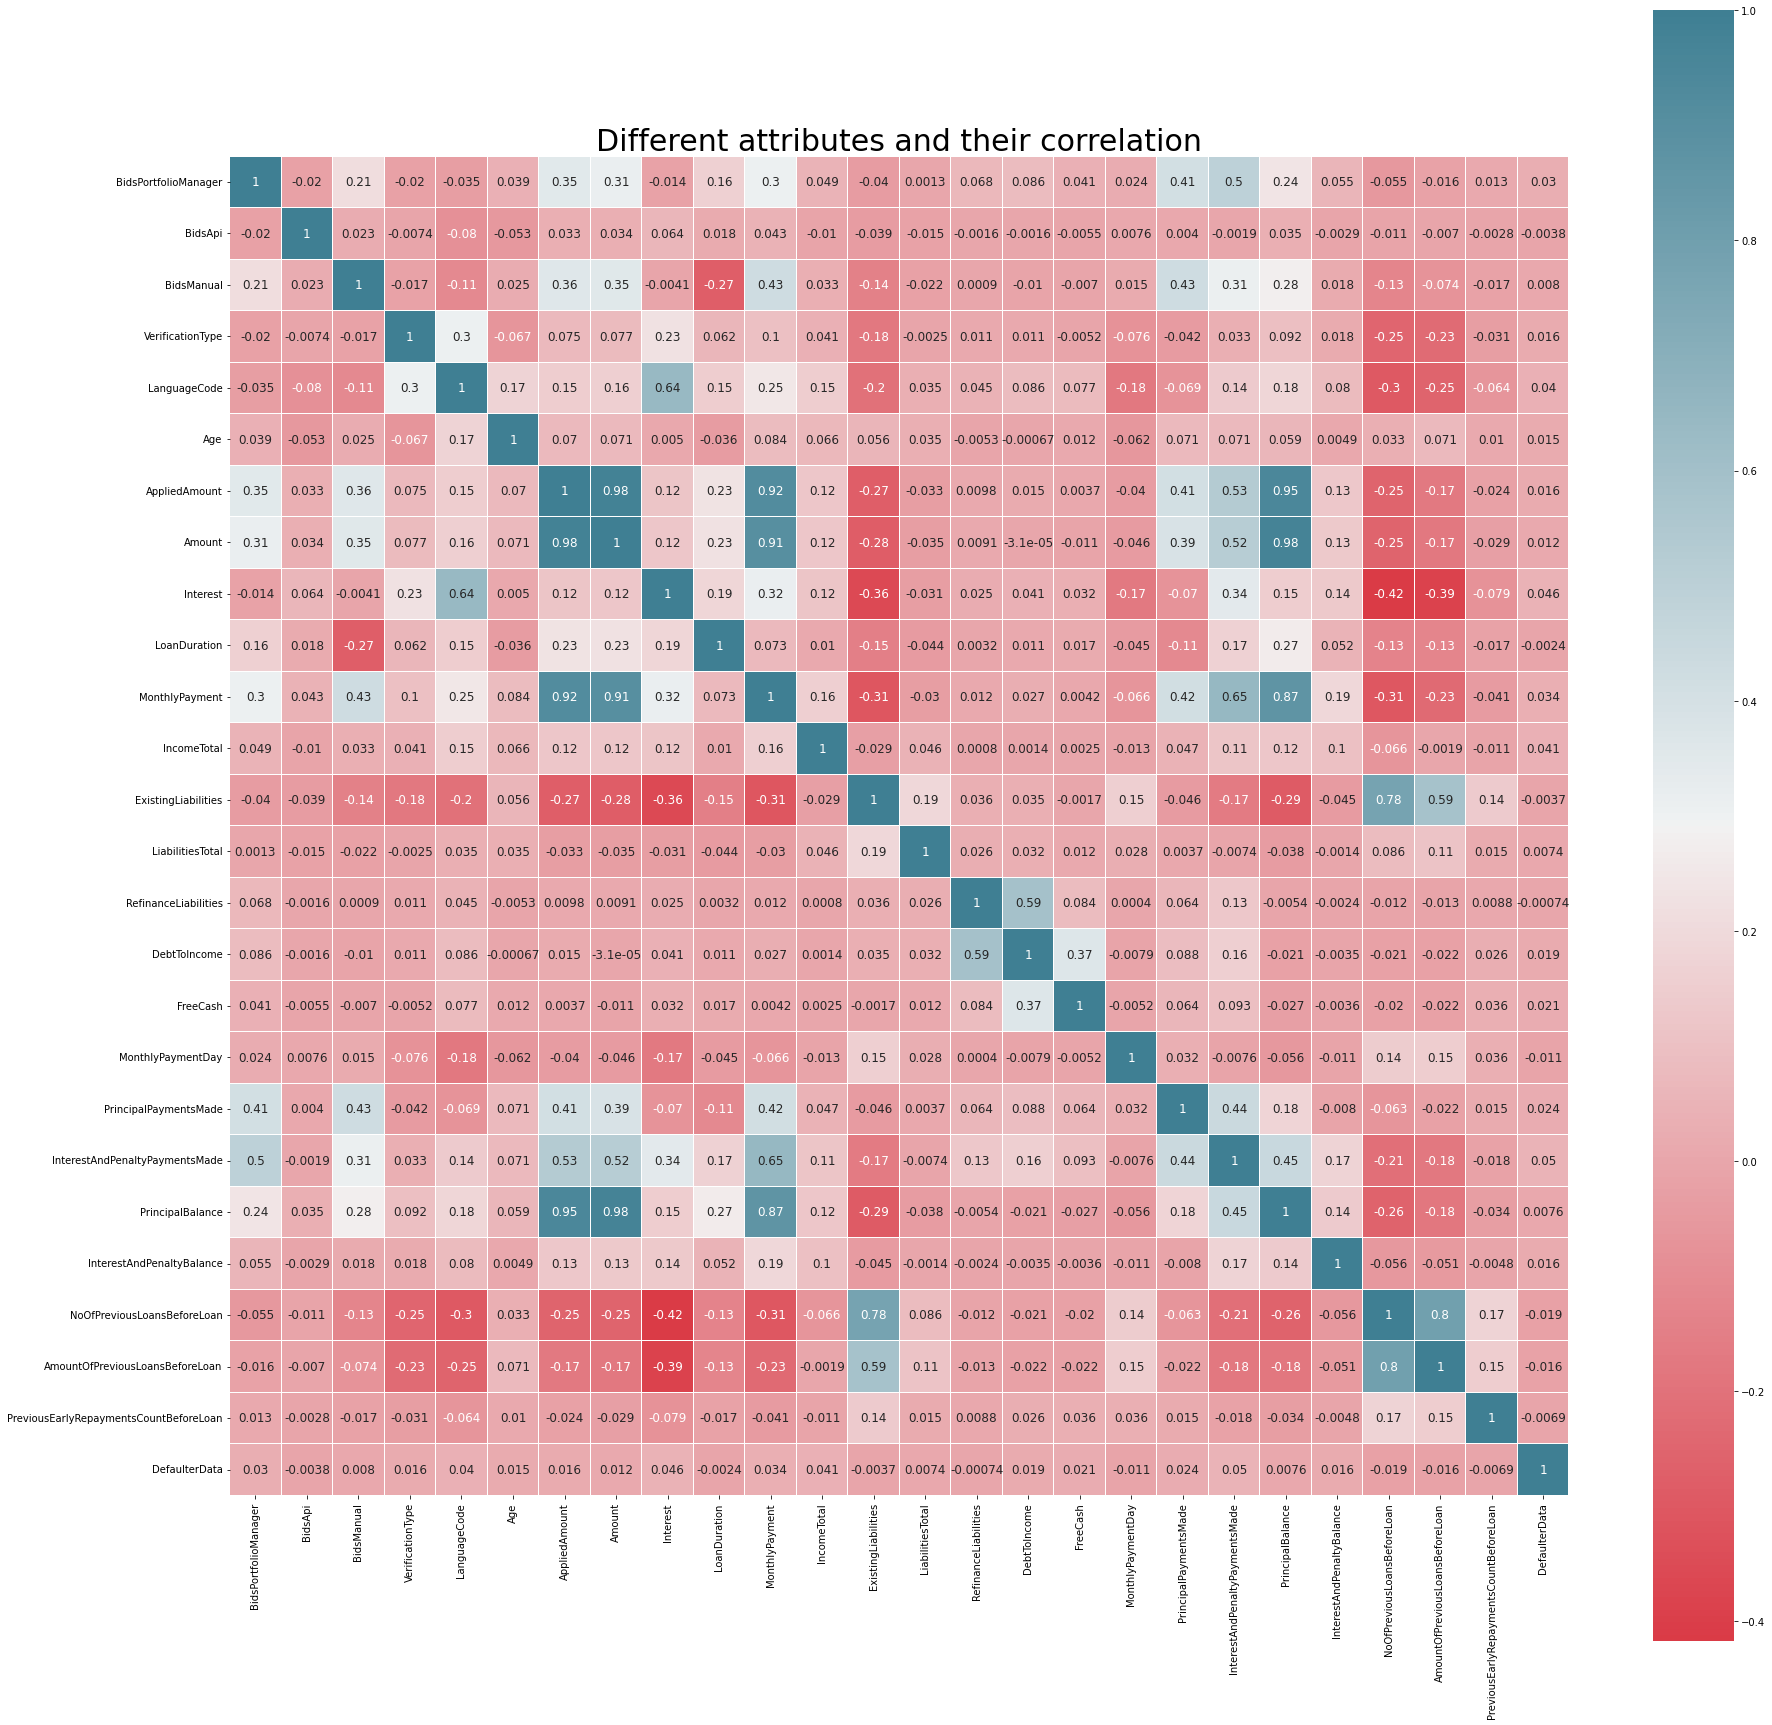

In [94]:
plt.figure(figsize=(30,30))
plt.title('Different attributes and their correlation', size = 30)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

Index(['DefaulterData', 'InterestAndPenaltyPaymentsMade', 'Interest',
       'IncomeTotal', 'LanguageCode', 'MonthlyPayment', 'BidsPortfolioManager',
       'PrincipalPaymentsMade', 'FreeCash', 'DebtToIncome', 'AppliedAmount'],
      dtype='object')


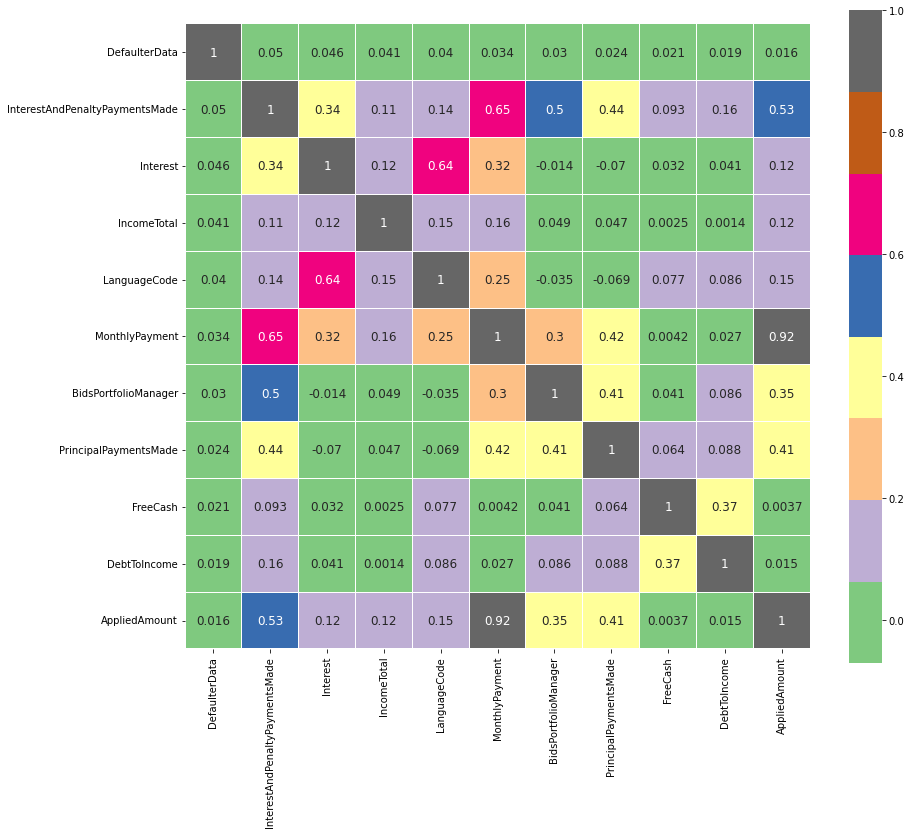

In [100]:
k=11
cols= correlation.nlargest(k,'DefaulterData')['DefaulterData'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=1, linewidths= 0.01, square= True, annot=True,cmap='Accent',
            linecolor="white", xticklabels= cols.values, annot_kws = {'size':12}, yticklabels = cols.values)

This heatmap also supports our finding which we printed earlier.

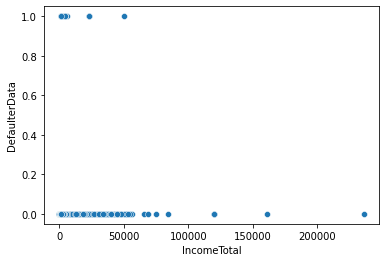

In [129]:
sns.scatterplot(x=df['IncomeTotal'], y=df['DefaulterData'])

This scatterplot shows an outlier Income

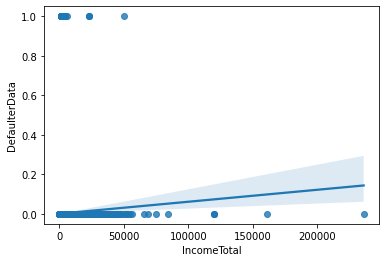

In [126]:
sns.regplot(x=df['IncomeTotal'], y=df['DefaulterData'])

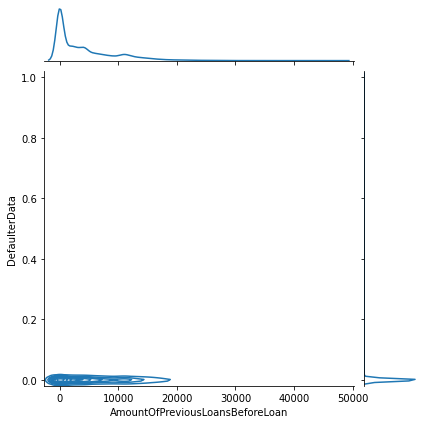

In [127]:
sns.jointplot(x=df['AmountOfPreviousLoansBeforeLoan'], y=df['DefaulterData'], kind="kde")